$$\min -(\sum_i^n \log{ x_i}-e^{x_i}) \quad\text{subject to}\quad Ax=b$$

In [6]:
from functions import *
import numpy as np

In [7]:
# Set the seed
# np.random.seed()
m = 1000
n = 2000

A = np.random.randn(m, n)
x0 = np.random.random(n)+1
b = A.dot(x0)
# store A and b to file
# np.savez("data.npz", A=A, b=b)

# Load A,b from npz
# data = np.load("data.npz")
# A = data["A"]
# b = data["b"]

# c = np.random.randn(n)

f = lambda x: -np.sum(np.log(x)-np.exp(x))
grad_f = lambda x: -1/x+np.exp(x)
nabla_f = lambda x: np.diag(1/x**2+np.exp(x))


decrement = lambda dx, x: (dx.dot(nabla_f(x).dot(dx)))**2/2

In [8]:
x_n, v_n = newton(f, grad_f, nabla_f, x0, A=A, b=b, dom_f=lambda x:True, MAXITERS=100, TOL=1e-8,alpha = 0.01, beta = 0.5, print_iter=True, eq=False, N=1)

Iteration: 1, decrement: 3124.0469249164
Iteration: 2, decrement: 274.8753656030
Iteration: 3, decrement: 1.8094974501
Iteration: 4, decrement: 0.0014421120
Iteration: 5, decrement: 0.0000000011


In [9]:
dom_f = lambda x: np.all(x>0)
x_q, v_q = quasi_newton(f, grad_f, x0, A=A, b=b, dom_f=dom_f, MAXITERS=100, TOL=1e-8, alpha = 0.01, beta = 0.5, print_iter=True)

Iteration: 1, decrement: 17881.7151435999
Iteration: 2, decrement: 215.9731698349
Iteration: 3, decrement: 48.8385267906
Iteration: 4, decrement: 20.4893787798
Iteration: 5, decrement: 12.4418461263
Iteration: 6, decrement: 5.7983163180
Iteration: 7, decrement: 1.2783170200
Iteration: 8, decrement: 0.0373209273
Iteration: 9, decrement: 0.0028053695
Iteration: 10, decrement: 0.0000456036
Iteration: 11, decrement: 0.0000019959
Iteration: 12, decrement: 0.0000008400
Iteration: 13, decrement: 0.0000000122
Iteration: 14, decrement: 0.0000000000


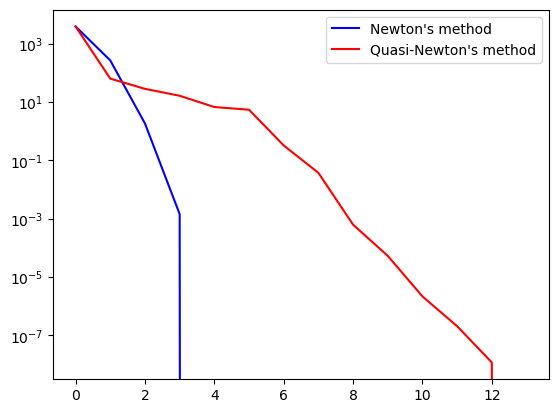

In [10]:
plot_error_iter(x_n, v_n, v_n[-1], "Newton's method")
plot_error_iter(x_q, v_q, v_n[-1], "Quasi-Newton's method",color='red')
plt.legend()

# Different example
$$\min_x c^Tx-\sum_{i=1}^m\log(b_i-a_i^T x)$$